In [17]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.config.experimental import list_physical_devices, set_virtual_device_configuration, VirtualDeviceConfiguration


RuntimeError: Virtual devices cannot be modified after being initialized

In [2]:
!cd models

In [7]:
model = load_model('models/LSTM_4-4-18.h5')

2023-04-04 20:05:39.424923: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-04 20:05:39.425828: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-04 20:05:39.451809: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-04 20:05:39.452196: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.83GHz coreCount: 48 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 462.00GiB/s
2023-04-04 20:05:39.452238: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-04 20:05:39.453835: I tensorflow/stream_executor/platfo

2023-04-04 20:12:38.118570: E tensorflow/stream_executor/cuda/cuda_dnn.cc:336] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2023-04-04 20:12:38.118601: W tensorflow/core/framework/op_kernel.cc:1763] OP_REQUIRES failed at cudnn_rnn_ops.cc:1514 : Unknown: Fail to find the dnn implementation.


UnknownError:    Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_predict_function_1790]

Function call stack:
predict_function -> predict_function -> predict_function


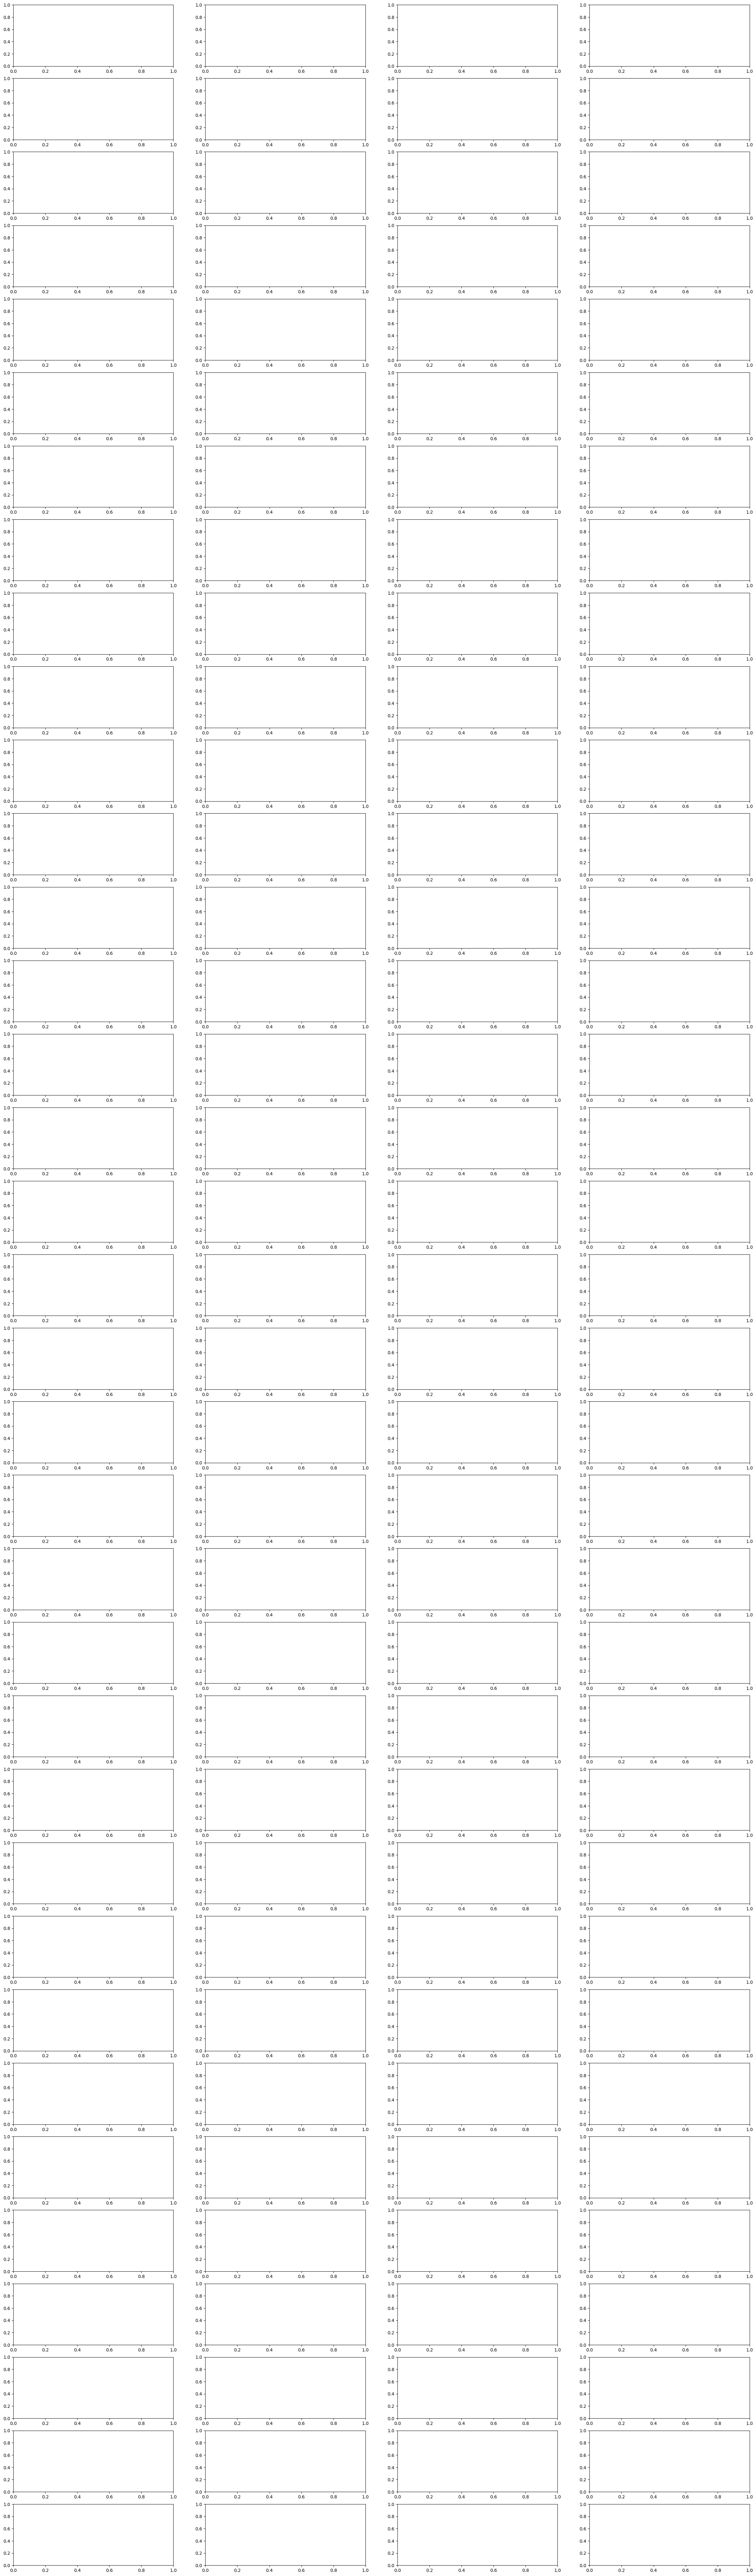

In [15]:
def is_LSTM_model_good(model,window_size=128):
    
    grbs = glob.glob("Data/A_grbs_jdxyzlog_firm3/*.csv")
    n_grbs = len(grbs)
    fig, axs = plt.subplots(n_grbs,4,figsize=(30,3*n_grbs))
    for n , grb in enumerate(grbs):
        df = pd.read_csv(grb)
        num_df = df.to_numpy() # for comparing (True)
        df = df.drop(['time'],axis=1)
        y_pred0 = []
        X0 = df[:window_size].copy().to_numpy()
        for i in range(len(df)-window_size):
            pred = model.predict(X0.reshape(1,window_size,4))[0]
            y_pred0.append(pred)
            X0 = df[i+1:i+window_size+1].copy().to_numpy()
            X0[:,-1] = pred
        true_lc = -1+10**(np.array(num_df[window_size:,-1]))
        pred_lc = -1+10**(np.array(y_pred0).T[0])
        
        axs[n,0].hist(true_lc-pred_lc)
        
        axs[n,1].plot(true_lc)
        axs[n,1].plot(pred_lc)
        
        axs[n,2].plot(true_lc[-64:])
        axs[n,2].plot(pred_lc[-64:])
        
        axs[n,3].plot((true_lc-pred_lc)/true_lc)

        

is_LSTM_model_good(model,window_size=64)